<a href="https://colab.research.google.com/github/Madhu27aa/Fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [57]:
import kagglehub


path = kagglehub.dataset_download("uditsharma72/real-vs-fake-faces")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uditsharma72/real-vs-fake-faces/versions/4


In [58]:
data=r'/root/.cache/kagglehub/datasets/uditsharma72/real-vs-fake-faces/versions/4'

In [59]:
batch_size=32
img_height=224
img_width=224

In [60]:
train_datagen=ImageDataGenerator (zoom_range=0.15,width_shift_range=0.2,shear_range=0.153)
test_datagen=ImageDataGenerator()

train=train_datagen.flow_from_directory(data, target_size=(img_height, img_width), class_mode="categorical", batch_size=batch_size, subset="training")

test =test_datagen.flow_from_directory (data, target_size=(img_height, img_width), class_mode="categorical", batch_size=batch_size, shuffle=False)

Found 2041 images belonging to 2 classes.
Found 2041 images belonging to 2 classes.


In [61]:
classes=2

In [62]:
Mobilenet=MobileNet(weights="imagenet", include_top=False, input_shape=(224,224,3))

In [63]:
for i in Mobilenet.layers:
  i.trainable=False

In [64]:

def main_model(t1_model,classes):
  m_model=t1_model.output
  m_model=GlobalAveragePooling2D()(m_model)
  m_model=Dense(1024,activation="relu")(m_model)
  m_model=Dense(1024,activation="relu")(m_model)
  m_model=Dense(512,activation="relu")(m_model)
  m_model=Dense(classes,activation="softmax")(m_model)
  return m_model

In [65]:
Mobilenet = MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [66]:
combining_model=main_model(Mobilenet,classes)

In [67]:
model=Model(inputs=Mobilenet.input,outputs=combining_model)

In [68]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,853,890 (22.33 MB)

 Trainable params: 5,832,002 (22.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [69]:
earlystop=EarlyStopping(patience=10)
learning_rate=ReduceLROnPlateau(monitor="val_accuracy",min_lr=0.001)
callbacks=[earlystop,learning_rate]

In [72]:
history=model.fit(train, validation_data=test, epochs=1)

64/64 ━━━━━━━━━━━━━━━━━━━━ 532s 8s/step - accuracy: 0.7230 - loss: 0.5725 - val_accuracy: 0.6556 - val_loss: 0.8762


In [74]:
model.save("project.h5")

In [75]:
test_score=model.evaluate(test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.4048 - loss: 1.5350


In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
target_names=[]
for key in train.class_indices:
  target_names.append(key)


In [ ]:
train_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
train_loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(train_accuracy))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_accuracy,'b',label="train_accuracy")
plt.plot(epochs,val_accuracy,'r',label="val_accuracy")
plt.legend()

In [84]:
labels=train.class_indices
labels={v:k for k,v in labels.items()}
labels

{0: 'fake', 1: 'real'}

In [85]:
from tensorflow.keras.models import load_model
import ast
from tensorflow.keras.preprocessing import image


In [91]:
def predict_image(imgname, from_test_dir):
  test_image = image.load_img(imgname, target_size=(224, 224))
  plt.imshow(test_image)
  plt.show()
  test_image = np.array(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  result = model.predict(test_image)
  result_dict = dict()


  for key in labels.keys():
    result_dict[labels[key]] = result[0][key]

  sorted_results = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

  if not from_test_dir:
    print('=' * 50)
    for label in sorted_results.keys():
      print("{}:()%".format(label, sorted_results[label] * 100))

  final_result = dict()

  first_key = list(sorted_results.keys())[0]
  final_result[first_key] = sorted_results[first_key] * 100

  return final_result





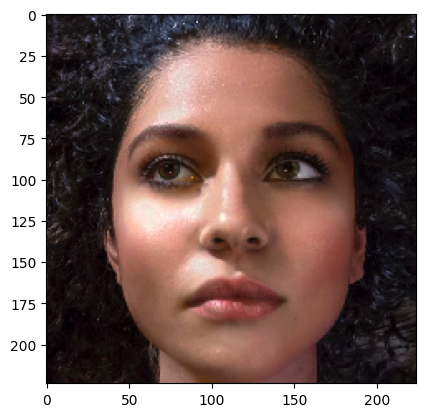

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
{'real': 93.82097125053406}


In [98]:

final_result1 = predict_image("/root/.cache/kagglehub/datasets/uditsharma72/real-vs-fake-faces/versions/4/real/real_00006.jpg", True)  # Assuming 'real_00001.jpg' is in the dataset folder
print(final_result1)